In [1]:
import utils
import utils.optm as optm
import utils.lossfunc as lf
import numpy as np
import torch
from importlib import reload
import nsp
reload(optm)
reload(lf)

<module 'utils.lossfunc' from '/home/user/project/python/nsp/utils/lossfunc.py'>

In [2]:
X = np.random.rand(16).reshape(4, 4)-0.5
X = X + X.T + np.eye(4)
def callbackF(x, f, context):
    print("target value : {:.5f} in the context {}".format(f,context))

In [26]:
import scipy.optimize as optimize


model = nsp.model.unitary_generator(4, dtype=np.complex128, shperical = False)
# loss = nsp.loss.mes(X_list[37], [2,2])
loss = nsp.loss.mes(X, [4])
solver = nsp.solver.sym_solver(model, loss, zero_origin=True)
# bounds = [[0, 100]] + [[0, 2*np.pi]] * (model.n_params-1)
bounds = [[0,30]]*model.n_params
ret = optimize.dual_annealing(solver, bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**5, maxiter = 500, callback=callbackF)
print(ret.fun)

target value : 0.22371 in the context 0
target value : 0.16009 in the context 0
target value : 0.07779 in the context 0
target value : 0.00174 in the context 1
target value : 0.00174 in the context 1
target value : 0.00174 in the context 1
target value : 0.00173 in the context 0
target value : 0.00000 in the context 1
6.32946139944579e-10


### Check periodicity

### 1 dimensional parameter

In [3]:
model = nsp.model.unitary_generator(2, dtype=np.float64, spherical = True)
loss = nsp.loss.mes(X, [2, 2])
solver = nsp.solver.sym_solver(model, loss)

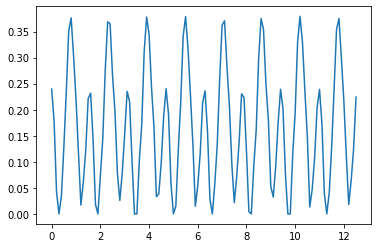

In [4]:
from matplotlib import pyplot as plt
t_list=np.arange(0, 4*np.pi, 0.1)
res = []
for t in t_list:
    res.append(solver([t]))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

### 6-d parameter

In [5]:
model = nsp.model.unitary_generator(4, dtype=np.float64, spherical=True)
loss = nsp.loss.mes(X, [4])
solver = nsp.solver.sym_solver(model, loss)

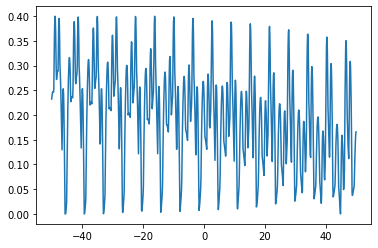

In [10]:
from matplotlib import pyplot as plt
t_list=np.arange(-50, 50, 0.1)
params = np.random.rand(model.n_params)
res = []
for t in t_list:
    params[0] = t
    res.append(solver(params))
#     print(np.linalg.norm(func.coord))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()

# unitary vs orthogonal

## 4D real-symmetric matrix

In [19]:
reload(optm)
reload(lf)
from tqdm.auto import tqdm
import scipy.optimize as optimize
from nsp.solver import sym_solver
model6 = nsp.model.unitary_generator(6, dtype=np.float64)
model4 = nsp.model.unitary_generator(4, dtype=np.float64)
model3 = nsp.model.unitary_generator(3, dtype=np.float64)
model2 = nsp.model.unitary_generator(2, dtype=np.float64)

model6_c = nsp.model.unitary_generator(6, dtype=np.complex128)
model4_c = nsp.model.unitary_generator(4, dtype=np.complex128)
model3_c = nsp.model.unitary_generator(3, dtype=np.complex128)
model2_c = nsp.model.unitary_generator(2, dtype=np.complex128)

loss = nsp.loss.mes(X, [4])
solver = sym_solver(model4, loss)

check if actually find the best basis when no restriction on orthogonal or unitary

In [12]:
N = 10
L = 4
t_float = []
t_comp = []
X_global = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    X_global.append(X)
#     X_global[_]
#     func = optm.unitary_optm(X, N = 1, dtype=np.float64)
    loss = nsp.loss.mes(X, [4])
    bounds = [[-30, 30]]*model4.n_params
    ret = optimize.dual_annealing(sym_solver(model4, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 200)
    t_float.append(ret.fun)
    
    bounds = [[-30, 30]]*model4_c.n_params
    loss = nsp.loss.mes(X, [4])
    ret = optimize.dual_annealing(sym_solver(model4_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 200)
    t_comp.append(ret.fun)

  0%|          | 0/10 [00:00<?, ?it/s]

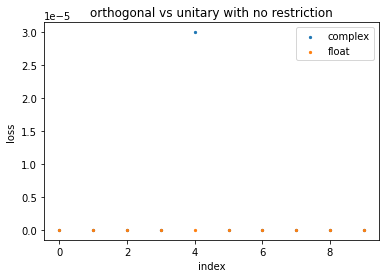

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.scatter(np.arange(N), np.round(t_comp,5), s = 5,  label = "complex")
ax.scatter(np.arange(N), np.round(t_float,5), s = 5, label = "float")
ax.set_title('orthogonal vs unitary with no restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss ')
ax.legend()
fig.show()
plt.savefig('without_res.jpg', dpi=400, bbox_inches="tight")

### Next check with tensor-product-form unitary matrix

In [14]:
import scipy.optimize as optimize
    
N = 100
L = 4
t_float = []
t_comp = []
X_list = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    X_list.append(X)
    loss = nsp.loss.mes(X, [2, 2])    
    bounds = [[-30, 30]]*model2.n_params
    ret = optimize.dual_annealing(sym_solver(model2, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100)
    t_float.append(ret.fun)
    
    func = optm.unitary_optm(X, N = 2, dtype=np.complex128)
    bounds = [[-30, 30]]*model2_c.n_params
    ret = optimize.dual_annealing(sym_solver(model2_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100)
    t_comp.append(ret.fun)
        

  0%|          | 0/100 [00:00<?, ?it/s]

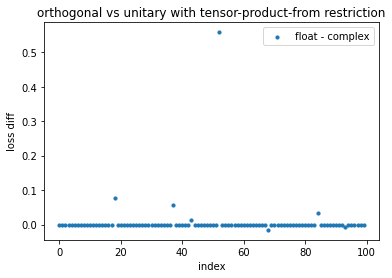

In [15]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff = np.array(t_float) - np.array(t_comp)
ax.scatter(np.arange(N), diff, s = 10,  label = "float - complex")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
fig.show()
plt.savefig('res1.jpg', dpi=400, bbox_inches="tight")

### Check deeply, with more iterations and inital_temperature

In [17]:
X = X_list[np.argmax(diff)]

t2_float = []
t2_comp = []
ori_diff = []
for i in tqdm(range(N)):
    if abs(diff[i]) > 1E-2:
        ori_diff.append(diff[i])
        X = X_list[i]
        loss = nsp.loss.mes(X, [2, 2])
        bounds = [[-30, 30]]*model2.n_params
        ret_float = optimize.dual_annealing(sym_solver(model2, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                      visit = 2.7, initial_temp = 10**4, maxiter = 1000)


        bounds = [[-30, 30]]*model2_c.n_params
        ret_comp = optimize.dual_annealing(sym_solver(model2_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                      visit = 2.7, initial_temp = 10**4, maxiter = 1000)
        t2_float.append(ret_float.fun)
        t2_comp.append(ret_comp.fun)       
        print(ret_float.fun - ret_comp.fun)

  0%|          | 0/100 [00:00<?, ?it/s]

0.07588795139649429
0.0564059227324063
0.014108603202001913
0.558055617212827
6.977751709769109e-11
0.0338644361613194


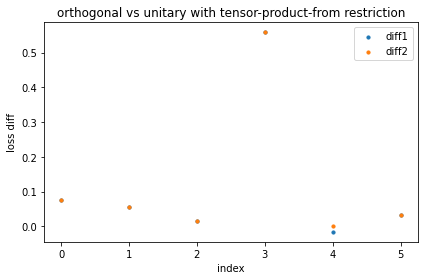

In [18]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff2 = np.array(t2_float) - np.array(t2_comp)
N2 = len(diff2)
ax.scatter(np.arange(N2), ori_diff, s = 10,  label = "diff1")
ax.scatter(np.arange(N2), diff2, s = 10,  label = "diff2")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
plt.tight_layout()
fig.show()
plt.savefig('res2.jpg', dpi=400, bbox_inches="tight")

## Higher dimension 6D

In [42]:
X = np.random.rand(L*L).reshape(L, L)-0.5
X = X + X.T + np.eye(L)
model = nsp.model.unitary_generator(6, dtype=np.complex128, spherical=False)
loss = nsp.loss.mes(X, [6])
# bounds = [[0, 30]] + [[0, 2*np.pi]]*(model6_c.n_params-1)
bnounds = [[-30, 30]] * model.n_params
ret = optimize.dual_annealing(sym_solver(model6_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                              visit = 2.8, initial_temp = 10**5, maxiter = 500, callback=callbackF)
print(ret.fun)

target value : 0.43130 in the context 0
target value : 0.26769 in the context 0
target value : 0.18321 in the context 0
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
target value : 0.00037 in the context 1
0.0003673409811799644


In [20]:
N = 5
L = 6
t_float = []
t_comp = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    loss = nsp.loss.mes(X, [6])
    bounds = [[-30, 30]]*model6.n_params
    ret = optimize.dual_annealing(sym_solver(model6, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 200)
    t_float.append(ret.fun)
    
    bounds = [[-30, 30]]*model6_c.n_params
    loss = nsp.loss.mes(X, [6])
    ret = optimize.dual_annealing(sym_solver(model6_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**5, maxiter = 200)
    t_comp.append(ret.fun)

  0%|          | 0/30 [00:00<?, ?it/s]

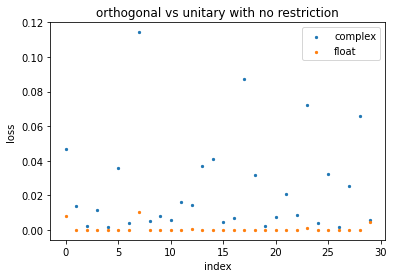

In [27]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.scatter(np.arange(N), t_comp, s = 5,  label = "complex")
ax.scatter(np.arange(N), t_float, s = 5, label = "float")
ax.set_title('orthogonal vs unitary with no restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss ')
ax.legend()
fig.show()
plt.savefig('without_res_6D.jpg', dpi=400, bbox_inches="tight")

In [43]:
import scipy.optimize as optimize
from tqdm.auto import tqdm
    
N = 10
L = 9
t_float = []
t_comp = []
X_list = []
for _ in tqdm(range(N)):
    X = np.random.rand(L*L).reshape(L, L)-0.5
    X = X + X.T + np.eye(L)
    X_list.append(X)
    loss = nsp.loss.mes(X, [3, 3])    
    bounds = [[-30, 30]]*model3.n_params
    ret = optimize.dual_annealing(sym_solver(model3, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**2, maxiter = 100)
    t_float.append(ret.fun)
    
    bounds = [[-30, 30]]*model3_c.n_params
    ret = optimize.dual_annealing(sym_solver(model3_c, loss), bounds = bounds, restart_temp_ratio = 1e-3,
                                  visit = 2.7, initial_temp = 10**3, maxiter = 100)
    t_comp.append(ret.fun)
        

  0%|          | 0/10 [00:00<?, ?it/s]

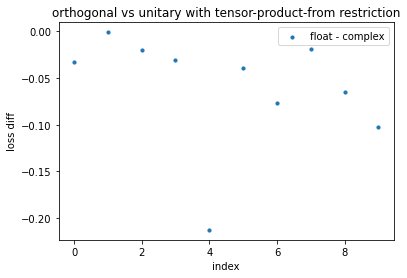

In [60]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

diff = np.array(t_float) - np.array(t_comp)
ax.scatter(np.arange(N), diff, s = 10,  label = "float - complex")

ax.set_title('orthogonal vs unitary with tensor-product-from restriction')
ax.set_xlabel('index')
ax.set_ylabel('loss diff')
ax.legend()
fig.show()
plt.savefig('res1_9D.jpg', dpi=400, bbox_inches="tight")

### The result saids unitary transformation doesn't achieve the global minimum

### Gradient Optimization


In [19]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
from scipy import sparse
import scipy
from utils import lossfunc as lf

import sys
import utils
import utils.optm as optm
import utils.lossfunc as lf
import numpy as np
import torch
from importlib import reload
import nsp
sys.path.append('..')

In [20]:
L = 4
np.random.seed(4)
X = np.random.rand(L*L).reshape(L, L)-0.5
X = X + X.T + np.eye(L)
# loss_ = loss(model.matrix())

In [26]:
import scipy.optimize as optimize
from nsp.solver import sym_solver
model = nsp.model.unitary_generator(2, dtype=np.complex128)
loss = nsp.loss.mes(X, [2,2])

bounds = [[-30, 30]] * model._n_params
ret = optimize.dual_annealing(sym_solver(model, loss, False), bounds = bounds, restart_temp_ratio = 1e-3,
                              visit = 2.7, initial_temp = 10**4, maxiter = 200)
print(ret.fun)

2.372445943373357


In [31]:
model = nsp.model.unitary_generator(2, dtype=torch.complex128)
loss = nsp.loss.mes(torch.tensor(X), [2,2])
# solver = nsp.solver.unitary_symm_ts(torch.optim.Adam, model, loss)
model = nsp.model.unitary_generator(2, dtype=np.complex128, spherical = False)
loss = nsp.loss.mes(X, [2, 2])
func = nsp.solver.sym_solver(model, loss)

In [32]:
func(func.model._params)

0.4389829508582124

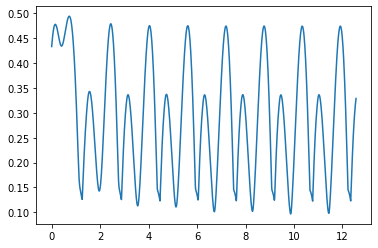

In [34]:
from matplotlib import pyplot as plt
t_list=np.arange(0, 4*np.pi, 0.01)
res = []
for t in t_list:
    func.model._params[0] = t
    res.append(func(func.model._params))
fig, ax = plt.subplots()
ax.plot(t_list, res)
fig.show()